# The Cyclic Hopfield Network

**NX-465 Mini-project MP2, Spring semester 2025**

## Introduction
The Hopfield network is a classical model that helps us understand how memories are stored and retrieved in neural systems. It operates by associating stored patterns with stable fixed points; if a small error occurs, the system naturally corrects itself by converging back to the correct pattern.
In this project, we will take the Hopfield model a step further. Instead of focusing on the stationary states, we will explore stable limit cycles where the neuronal states evolve over time following a sequence of patterns. You will be implementing this extension with minimal modifications to the classical model and investigate its ability to store and retrieve sequences of patterns. Further, you will also implement the cyclic Hopfield model as a continuous dynamical system, which will be compared to the discrete system and analysed using simple dimensionality reduction techniques.
Note: the project is intended to be solved using Python without the need for any specific library (other than the usual numpy and matplotlib). You are free to use other libraries if you want.
At the bottom of the project you will find a list of resources and references for further reading.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Ex 0. Getting Started: Cyclic Hopfield model

We start with a classical Hopfield-like setup, with a network consisting of N neurons with connectivity matrix $\mathbb{w}_{ij}$ . Each neuron i has a continuously-valued state $S_i(t) \in [-1, 1]$, which updates according to
\begin{equation}
	S_i^{(n)} = \operatorname{tanh} \left( \beta \sum_{j=1}^{N} w_{ij} S_j^{(n-1)} \right)
\tag{1}
\end{equation}
where (n) denotes the iteration number and $\beta$ is the shape parameter of the transfer function. The connectivity matrix will be defined as
\begin{equation}
	\mathbb{w}_{ij} = \frac{1}{N}\left[p_i^1 p_j^P+ \sum_{\mu=2}^P p_i^{\mu} p_j^{\mu-1} \right]
\tag{2}
\end{equation}

 where P ≤ N is the number of patterns that make up the connectivity. Unlike in the standard, static Hopfield model, here the patterns are not fixed points of the system, but rather points along a limit cycle. As such this system will be called a cyclic Hopfield model. We will be taking random patterns where each entry per pattern takes on a value $p^{\mu}_i \in \{-1, 1\}$ both with equal probability.

**0.1**. Write a function that generates network patterns as defined above, as a function of P and N.
As in the standard Hopfield model, we can define overlap variables both to better understand the network dynamics as well as to reduce computational complexity. For each pattern $p^{\mu}$ the corresponding overlap
variable is defined as
\begin{equation}
	m^{\mu, (n)} = \frac{1}{N} \sum_{i=1}^{N} p^{\mu}_i S_i^{(n)}
\tag{3}
\end{equation}

In [5]:
def network_patterns(P, N):
    """
    Function that generates random network patterns.
    Input: P = number of patterns (int)
           N = number of neurons (int)
    Output: A matrix of size (P, N) where each row is a pattern, and each entry is either -1 or 1. (np.ndarray)
    """
    return np.random.choice([-1, 1], size=(P, N))

**0.2**. Rewrite the right-hand side of equation (1) in terms of the patterns and the overlap variables, making use of Eqs. (2) and (3).

<span style="color:#EAD2AC">

$Solution \space0.2:$
Equation (1) is given by $S_i^{(n)} = \operatorname{tanh} \left( \beta \sum_{j=1}^{N} w_{ij} S_j^{(n-1)} \right)$.
Let's develop the right-hand side. First, replace $\mathbb{w}_{ij}$ using equation (2):
\begin{equation*}
	 \operatorname{tanh} \left( \beta \sum_{j=1}^{N} w_{ij} S_j^{(n-1)} \right) = \operatorname{tanh} \left( \beta \sum_{j=1}^{N} \frac{1}{N}\left[p_i^1 p_j^P+ \sum_{\mu=2}^P p_i^{\mu} p_j^{\mu-1} \right] S_j^{(n-1)} \right)=
\end{equation*}

\begin{equation*}
	  \operatorname{tanh} \left( \beta \sum_{j=1}^{N} \frac{1}{N}[p_i^1 p_j^P]S_j^{(n-1)}+ \beta \sum_{j=1}^{N} \frac{1}{N} [\sum_{\mu=2}^P p_i^{\mu} p_j^{\mu-1}] S_j^{(n-1)} \right)
\end{equation*}
Using (3), we obtain: 
\begin{equation*}
	  \operatorname{tanh} \left( \beta \left[m^{P,(n-1)} p_i^{1}+  \sum_{\mu=2}^P m^{\mu-1, (n-1)} p_i^{\mu}\right] \right)
\end{equation*}

Consider finally that $m^{0, (n-1)} = m^{P, (n-1)}$ for cyclic consistency, we obtain:
\begin{equation*}
	 S_i^{(n)} =\operatorname{tanh} \left( \beta \sum_{j=1}^{N} w_{ij} S_j^{(n-1)} \right) = \operatorname{tanh} \left( \beta \sum_{\mu=1}^P m^{\mu-1, (n-1)} p_i^{\mu} \right)
\end{equation*}

Remind that 
\begin{equation}
	m^{\mu, (n)} = \frac{1}{N} \sum_{i=1}^{N} p^{\mu}_i S_i^{(n)}
\tag{3}
\end{equation}
Or in our case 
\begin{equation}
	m^{\mu, (n-1)} = \frac{1}{N} \sum_{i=1}^{N} p^{\mu}_i S_i^{(n-1)}
\tag{3'}
\end{equation}
and
\begin{equation}
	\mathbb{w}_{ij} = \frac{1}{N}\left[p_i^1 p_j^P+ \sum_{\mu=2}^P p_i^{\mu} p_j^{\mu-1} \right]
\tag{2}
\end{equation}

**0.3**. Explain (without simulation) why this system can be considered as *cyclic*, by explaining how the network would evolve if the state of all neurons is initialised along pattern 1: $S^{(0)}_i = p^1_i$.

**Hint:**
* For this you may consider an ideal scenario where $\beta$ is sufficiently large such that $\operatorname{tanh}(\beta x) ≈ \operatorname{sign}(x)$ and where the different patterns have no overlap between each other: $\sum_{i=1}^{N}p^{\mu}_i p^{\nu}_i = 0$ if $\mu \neq \nu$.
* To manually compute the state of the system at iteration 1, first compute the overlap variables $m^{\mu, (0)}$, and combine it with the equation derived in the previous question.
* From this, Eq. (3) can be used to find $m^{\mu, (1)}$. Extrapolate your result to many iterations to answer the question.

<span style="color:#EAD2AC">

$Solution \space 0.3:$
If we use the definition of the overlap given by (3), we have
\begin{equation*}
	m^{\mu, (0)} = \frac{1}{N} \sum_{i=1}^{N} p^{\mu}_i S_i^{(0)}
\end{equation*}
By susbtituting $S^{(0)}_i = p^1_i$ in this equation, we obtain
\begin{equation*}
	m^{\mu, (0)} = \frac{1}{N} \sum_{i=1}^{N} p^{\mu}_i p^1_i
\end{equation*}
There is no overlap between different patterns (by hint assumption), which inplies the orthogonality of the stored patterns: $\sum_{i=1}^{N}p^{\mu}_i p^{\nu}_i = 0$ if $\mu \neq \nu$.
Therefore, we have
\begin{equation}
\left\{\begin{array}{ll}
	m^{\mu, (0)} =0 \textrm{, for } \mu \neq 1 \\
	m^{1, (0)} =1 \textrm{, otherwise}
\end{array}\right.
\tag{**}
\end{equation}

From the question 0.2, we obtained that $S_i^{(n)} = \operatorname{tanh} \left( \beta \sum_{\mu=1}^P m^{\mu-1, (n-1)} p_i^{\mu} \right)$. Therefore, $S_i^{(1)} = \operatorname{tanh} \left( \beta \sum_{\mu=1}^P m^{\mu-1, (0)} p_i^{\mu} \right)$ and if we susbtitute the value of $m^{\mu, (0)}$ previously found, we obtain:
\begin{equation*}
	S_i^{(1)} = \operatorname{tanh} \left( \beta m^{0, (0)} p^{1}_i+\beta m^{1, (0)} p^{2}_i + \sum_{\mu=3}^P \beta m^{\mu-1, (0)} p_i^{\mu} \right)
\end{equation*}
which become
\begin{equation*}
	S_i^{(1)} = \operatorname{tanh} \left( \beta p^{2}_i \right)
\end{equation*}
using (**). In addition, for large value of $\beta$, $\operatorname{tanh}(\beta x) ≈ \operatorname{sign}(x)$. Therefore,
\begin{equation*}
	S_i^{(1)} = \operatorname{tanh} \left( \beta p^{2}_i \right) ≈ \operatorname{sign}(p^{2}_i) = p^{2}_i
\end{equation*}
Similarly as $m^{\mu, (0)}$, if we want to compute $m^{\mu, (1)}$ we use the overlap definition and, this time, $S_i^{(1)} = p^{2}_i$:
\begin{equation*}
\left\{\begin{array}{ll}
	m^{\mu, (1)} =0 \textrm{, for } \mu \neq 2 \\
	m^{2, (1)} =1 \textrm{, otherwise}
\end{array}\right.
\end{equation*}

If we repeat many times this process, we will obtain $m^{3, (2)} = 1$ because $S_i^{(2)} = p_i^{3}$, $m^{4, (3)} = 1$ because $S_i^{(3)} = p_i^{4}$, $m^{5, (4)} = 1$ because $S_i^{(4)} = p_i^{5}$, ... and so indefinitely. The pattern is $m^{P, (P-1)} = 1$ because $S_i^{(P-1)} = p_i^{P}$ through the whole cycle, and return at a state $m^{1, (P)} = 1$ because $S_i^{(P)} = p_i^{1}$ at the cycle end.
Therefore, the cycle repeats indefinitely, meaning the system cycles through the stored patterns in order: $p^1$, $p^2$, ..., $p^P$, $p^1$, ...


**0.4**. Verify your prediction from the previous question with a simulation of the more general, non-ideal scenario.

* Generate P = 10 patterns using your implementation from Ex. 0.1.
* Write code that simulates the evolution of the system for N = 100 neurons, $\beta$ = 4, $n_{max}$ = 20 iterations. It will be useful to keep track of both the neural state S and the overlap variables $m^{\mu}$ for every iteration.
* **Important**: Implement the update step according to the update equation derived in Ex 0.2, instead of using Eq. (1) directly. This will strongly reduce the computational complexity and make your simulations run many times faster.
* Create a single plot showing the evolution of the P overlap variables $m^{\mu}$ over iterations, and comment on your findings.


In [68]:
def cyclic_hopfield_simulation(P=10, N=100, beta=4, n_max=20, plot=False):
    """
    Simulates the cyclic Hopfield network dynamics and optionally plots overlap variables.

    Parameters:
        P (int): Number of patterns
        N (int): Number of neurons
        beta (float): Shape parameter of tanh transfer function
        n_max (int): Number of discrete time steps
        plot (bool): Whether to display a plot of the overlap dynamics

    Returns:
        m (np.ndarray): Overlap values, shape (n_max+1, P)
    """
    # Step 1: Generate random binary patterns {-1, 1}
    patterns = network_patterns(P, N)

    # Step 2: Initialize state and overlap storage
    S = np.zeros((n_max + 1, N))        # Neural state for each iteration
    m = np.zeros((n_max + 1, P))        # Overlaps for each pattern over time

    # Initialize: state = first pattern
    S[0] = patterns[0]

    # Step 3: Run dynamics
    for n in range(1, n_max + 1):
        # Compute overlaps at step n-1
        for mu in range(P):
            m[n-1, mu] = np.dot(patterns[mu], S[n-1]) / N

        # Compute next state using overlap-based update rule
        input_sum = np.zeros(N)
        for mu in range(P):
            prev_mu = (mu - 1) % P
            input_sum += m[n-1, prev_mu] * patterns[mu]
        S[n] = np.tanh(beta * input_sum)

    # Final overlaps at n_max
    for mu in range(P):
        m[n_max, mu] = np.dot(patterns[mu], S[n_max]) / N

    # Step 4: Plotting
    if plot:
        plt.figure(figsize=(15, 6))
        cmap = plt.get_cmap("hsv")
        colors = [cmap(i / P) for i in range(P)]

        for mu in range(P):
            for n in range(n_max + 1):
                is_diagonal = (mu == n % P)
                marker = 'x' if is_diagonal else 'o'
                plt.plot(
                    n,
                    m[n, mu],
                    marker=marker,
                    linestyle='None',
                    color=colors[mu],
                    markersize=10 if is_diagonal else 6,
                    markeredgewidth=2 if is_diagonal else 1,
                    markeredgecolor='black' if is_diagonal else None,
                )

        if P <= 20:
            for mu in range(P):
                # Dummy plots for legend
                plt.plot([], [], color=colors[mu], marker='o', linestyle='None', label=f"$m^{{{mu+1}}}$")

        plt.title("Evolution of Overlap Variables $m^\\mu$ Over Time")
        plt.xlabel("Iteration")
        plt.ylabel("Overlap $m^\\mu$")
        plt.xticks(ticks=range(n_max + 1), labels=[str(i + 1) for i in range(n_max + 1)])
        if P <= 20:
            plt.legend(ncol=2, fontsize="small")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


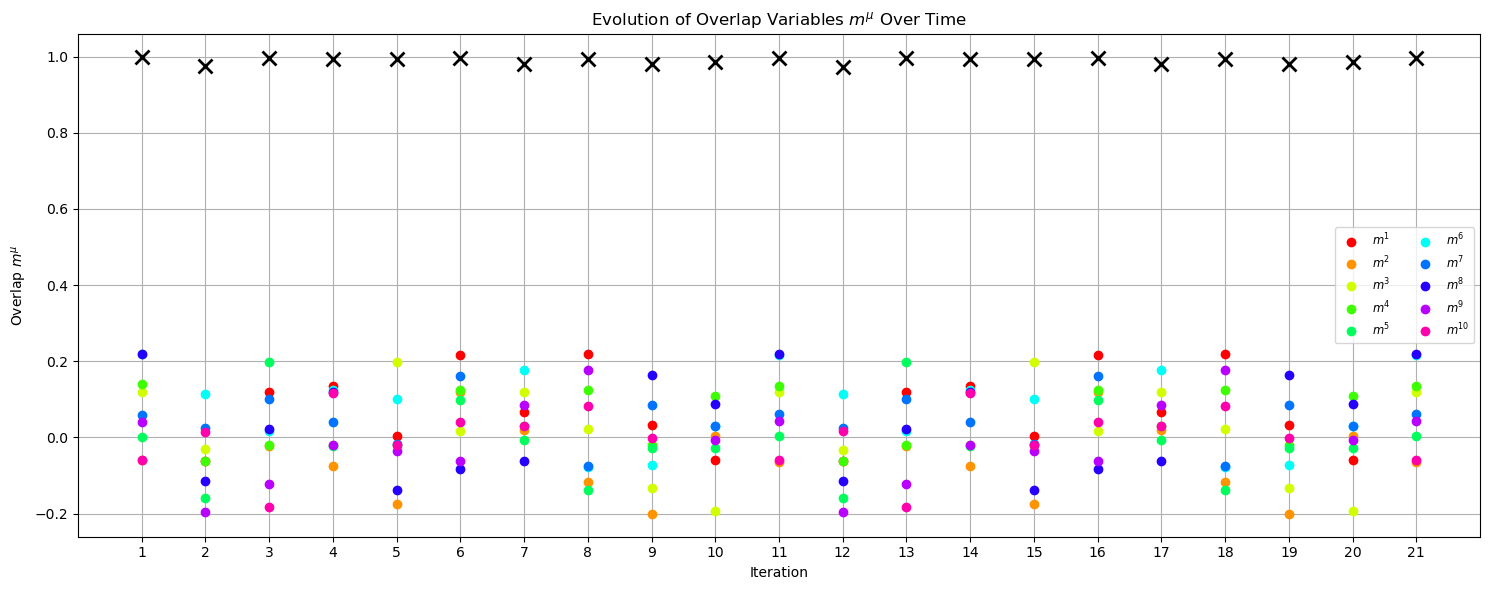

In [69]:
overlaps_p10 = cyclic_hopfield_simulation(P=10, plot=True)

<span style="color:#EAD2AC">

$Solution \space 0.4:$

We can see that $\forall \mu,\space m^{\mu, (\mu-1)\space mod\space P} \approx 1$ and other overlap values $m^{\mu}$ are close to zero.
They are not exactly equal to zero because it is not an 'ideal scenario' where 'different patterns have no overlap between each other', i.e:

$\sum_{i=1}^{N}p^{\mu}_i p^{\nu}_i = 0$ if $\mu \neq \nu$ is not necessarily true.

## Ex 1. Sequence storage and retrieval

Now that we have a working implementation of the cyclic Hopfield model we can evaluate some of its
properties. As in the classical Hopfield network, one of the main properties of interest is the network
capacity. We would like to find out how many patterns can be stored in the cycle and still be retrieved.
We start by looking at what happens when we increase the number of patterns $P$ in the network.

**1.1.** Redo the simulation of Ex. 0.4 but now with $P = 50$ patterns. You should observe a clear difference
in the dynamics of the overlap variables over iterations, with no clear cyclic behaviour. Why does this
happen?


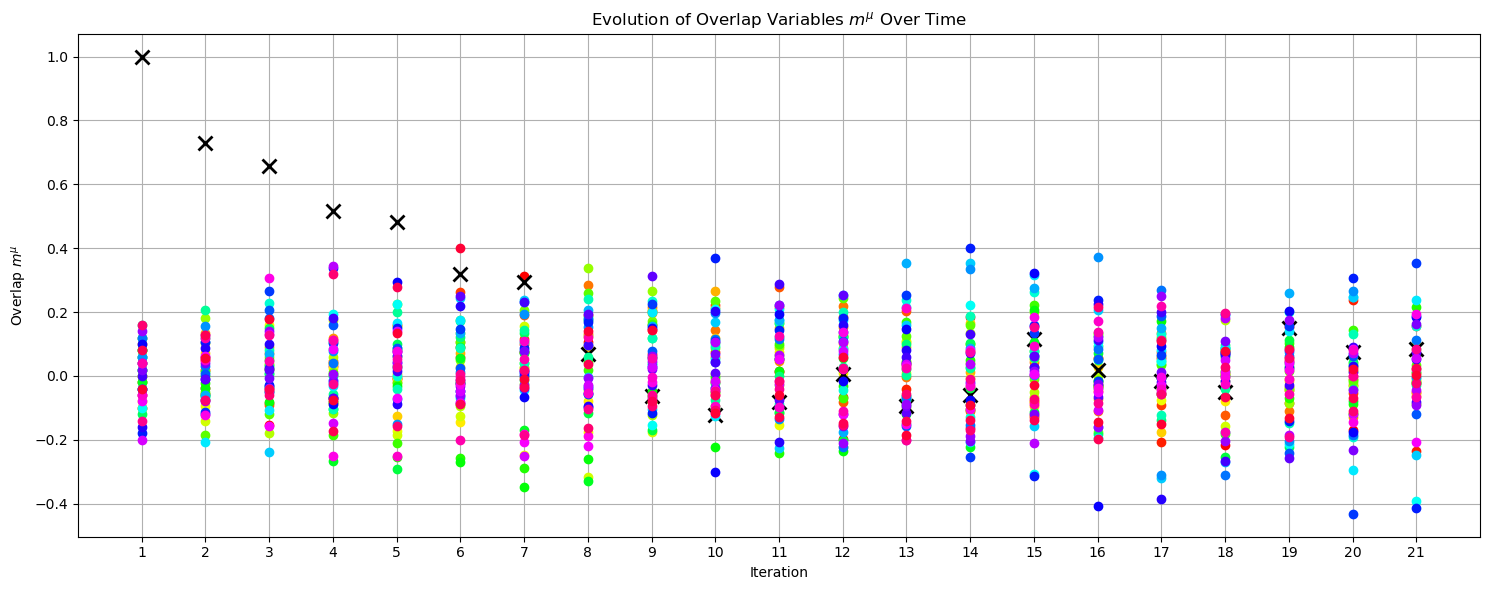

In [70]:
overlaps_p50 = cyclic_hopfield_simulation(P=50, plot=True)


<span style="color:#EAD2AC">

$Solution \space 1.1:$

We no longer observe a clear cyclic behavior because the number of stored patterns is too large. As a result, the patterns begin to significantly overlap with each other, making the overlap variable $m^{\mu, (\mu-1)\space mod\space P}$ behave more like a random quantity rather than a reliable indicator of pattern $\mu$. This degrades the network's ability to sequentially retrieve the stored patterns.

As in the standard Hopfield model, we can define overlap variables both to better understand the network dynamics as well as to reduce computational complexity. For each pattern $p^\mu$, the corresponding overlap variable is defined as

\begin{equation}
m^{\mu,(n)} = \frac{1}{N} \sum_{i=1}^{N} p_i^\mu S_i^{(n)}
\tag{3}
\end{equation}

**0.2.** Rewrite the right-hand side of equation (1) in terms of the patterns and the overlap variables, making use of Eqs. (2) and (3).
